In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

from utils import RandomSeedResetter
RandomSeedResetter.reset_random_seed(0)

In [2]:
data_load = np.load('data/chen/xyz_chen.npy')
x = data_load[:, 0]
max_x = np.max(x)
min_x = np.min(x)
x_norm = (2*x[:]-max_x-min_x) / (max_x-min_x)

data = np.reshape(x_norm[:], len(x_norm[:]))
print('data.shape:', data.shape)

data.shape: (80000,)


In [3]:
dim_input = 32
dim_output = 32
len_input = 256+1-dim_output
size_train = 60000
input_train = np.zeros((size_train, len_input, dim_input))
input_train_mlp = np.zeros((size_train, len_input+dim_input-1))
output_train = np.zeros((size_train, dim_output))

for idx_batch in range(size_train):
    for idx_len in range(len_input):
        input_train[idx_batch, idx_len, :] = data[idx_batch+idx_len:idx_batch+idx_len+dim_input]
    idx_input_end = idx_batch+idx_len+dim_input
    input_train_mlp[idx_batch, :] = data[idx_batch:idx_input_end]
    output_train[idx_batch, :] = data[idx_input_end:idx_input_end+dim_output]
idx_train_end = idx_input_end+dim_output
print('The end index of train:', str(idx_train_end))

size_test = 10000
input_test = np.zeros((size_test, len_input, dim_input))
input_test_mlp = np.zeros((size_test, len_input+dim_input-1))
output_test = np.zeros((size_test, dim_output))
for idx_batch in range(size_test):
    for idx_len in range(len_input):
        input_test[idx_batch, idx_len, :] = data[(idx_batch+idx_len)+idx_train_end:(idx_batch+idx_len+dim_input)+idx_train_end]
    idx_input_end = (idx_batch+idx_len+dim_input)+idx_train_end
    input_test_mlp[idx_batch, :] = data[idx_batch+idx_train_end:idx_input_end]
    output_test[idx_batch, :] = data[idx_input_end:idx_input_end+dim_output]
idx_test_end = idx_input_end+dim_output
print('The end index of test:', str(idx_test_end))

print('Train: size of input and output:', input_train.shape, output_train.shape)
print('Test : size of input and output:', input_test.shape, output_test.shape)

The end index of train: 60287
The end index of test: 70574
Train: size of input and output: (60000, 225, 32) (60000, 32)
Test : size of input and output: (10000, 225, 32) (10000, 32)


(0, 31)

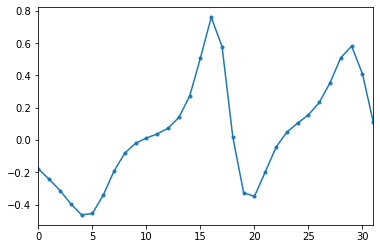

In [4]:
plt.plot(input_train[-1, -1, :], marker='.')
plt.xlim(0, dim_input-1)

(0, 31)

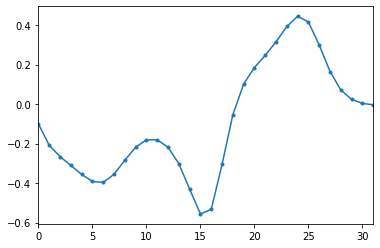

In [5]:
plt.plot(output_train[-1, :], marker='.')
plt.xlim(0, dim_output-1)

In [6]:
# shuffle the dataset
idx_train = random.sample(range(size_train), k=size_train)
idx_test = random.sample(range(size_test), k=size_test)

print('Random index of train:', idx_train[-10:])
print('Random index of test:', idx_test[-10:])

Random index of train: [7211, 42060, 50822, 4076, 34757, 6641, 51319, 6584, 42772, 24413]
Random index of test: [2908, 2569, 1253, 2738, 9732, 7160, 8802, 1245, 1412, 6069]


In [7]:
_input_train_shuffle = np.zeros((size_train, len_input, dim_input))
_input_train_mlp_shuffle = np.zeros((size_train, len_input+dim_input-1))
_output_train_shuffle = np.zeros((size_train, dim_output))
for i in range(size_train):
    idx = idx_train[i]
    _input_train_shuffle[i, :, :] = input_train[idx, :, :]
    _input_train_mlp_shuffle[i, :] = input_train_mlp[idx, :]
    _output_train_shuffle[i, :] = output_train[idx, :]
input_train_shuffle = _input_train_shuffle[:50000, :, :]
input_train_mlp_shuffle = _input_train_mlp_shuffle[:50000, :]
output_train_shuffle = _output_train_shuffle[:50000, :]

input_valid = _input_train_shuffle[50000:, :, :]
input_valid_mlp = _input_train_mlp_shuffle[50000:, :]
output_valid = _output_train_shuffle[50000:, :]

In [8]:
print('Train : ', input_train_shuffle.shape, output_train_shuffle.shape)
print('Valid : ', input_valid.shape, output_valid.shape)
print('Test : ',  input_test.shape,  output_test.shape)
print('Train_MLP : ', input_train_mlp_shuffle.shape)
print('Valid_MLP : ', input_valid_mlp.shape)
print('Test_MLP : ',  input_test_mlp.shape)

np.save('data/chen/input_train', input_train)
np.save('data/chen/input_train_shuffle', input_train_shuffle)
np.save('data/chen/input_train_mlp', input_train_mlp)
np.save('data/chen/input_train_mlp_shuffle', input_train_mlp_shuffle)
np.save('data/chen/output_train', output_train)
np.save('data/chen/output_train_shuffle', output_train_shuffle)

np.save('data/chen/input_valid', input_valid)
np.save('data/chen/output_valid', output_valid)
np.save('data/chen/input_valid_mlp', input_valid_mlp)

np.save('data/chen/input_test', input_test)
np.save('data/chen/output_test', output_test)
np.save('data/chen/input_test_mlp', input_test_mlp)

Train :  (50000, 225, 32) (50000, 32)
Valid :  (10000, 225, 32) (10000, 32)
Test :  (10000, 225, 32) (10000, 32)
Train_MLP :  (50000, 256)
Valid_MLP :  (10000, 256)
Test_MLP :  (10000, 256)
